# Microsoft AI School - Machine Learning Regression

# Bike Share Demand Analysis and Prediction

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Custom Settings

In [2]:
plt.style.use("ggplot")

import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")
mpl.rcParams["axes.unicode_minus"] = False

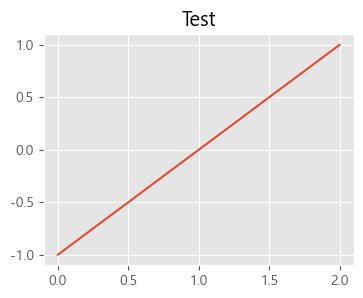

In [3]:
pd.Series([-1,0,1]).plot(figsize=(4,3), title="Test")
plt.show()

## Loading Data
* **pd.read_csv(`FILE PATH OF CSV`, parse_dates=`COLUMN TO LOAD IN datetime FORMAT`)**

* Attribute Information
    * `datetime` - Provides data by time intervals in the form of a timestamp (combined date and time).
    * `season`  - Encoded as1 = spring, 2 = summer, 3 = fall, 4 = winter.
    * `holiday` - Indicates holidays (excluding weekends). Encoded as 1-yes, 2-no.
    * `workingday` - Indicates workingdays. Encoded as 1-yes, 2-no.
    * `weather`
        * 1: Clear, Few clouds, Partly cloudy, Partly cloudy.
        * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.
        * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
        * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
    * `temp` - Temperacture in Celsius.
    * `atemp` - Feels-like temperature in Celsius.
    * `humidity` - Relative humidity.
    * `windspeed` - Wind speed.
    * `casual` - Number of non-registered user rentals.
    * `registered` -Number of registered user rentals. 
    * `count` - Total number of rentals.


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/BikeSharingDemand.csv', parse_dates=['datetime'])

In [5]:
display(df.head(3))
display(df.tail(3))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


data summary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## Adding new columns derived from existing columns

In [7]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek # Encoded 0 to 6 starting from Monday
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


## Exploratory Data Analysis